# The Greedy Approach

**Alunos**: 
* Lindomar Rodrigues de Azevedo
* Rafael Silva Tavares
* Gabriel Tavares dos Santos
* Izabela Caldeira Sena

---


Os algoritmos gulosos(`greedy algorithm`) é geralmente projetado para resolver **problemas de otimização** em que uma quantidade deve ser minimizada ou maximizado.

Os algoritmos gulosos geralmente consistem em um procedimento iterativo que tenta encontrar uma **solução ótima local**. Em alguns casos, essas soluções ótimas locais se traduzem em soluções ótimas globais. Em outros, eles não conseguem dar soluções ótimas.

Um algoritmo ganancioso faz uma estimativa correta com base de pouco cálculo sem se preocupar com o futuro.

  A **escolha feita é aquela que produz o maior ganho imediato**, mantendo a viabilidade.



---



## The Shortest Path Problem

***Inputs:*** Um grafo $\ G=(V, E)$, onde cada aresta $e \in E$ tem um tamanho não negativo e um vértice $s$ distinto dos demais denominado origem.

***Question:*** Qual a menor distância possível de $s$ para todos os vétices $v \in V$ ?

## Algoritmo Dijkstra’s

Descoberto (ou inventado?) por um holandês chamado **Edsger Dijkstra** em 1956.

Soluciona o problema do caminho mais curto num grafo orientado com **arestas de peso não negativo**, em tempo computacional $O(E+V\log(V))$.

O algoritmo que serve para resolver o mesmo problema em um grafo com pesos negativos é o algoritmo de Bellman-Ford, que possui maior tempo de execução que o Dijkstra(complexidade de $O(E*V)$).

Etapas do algoritmo:
- O algoritmo considera um conjunto $S$ de menores caminhos, iniciado com um vértice inicial $s$. 
- A cada passo do algoritmo busca-se nas adjacências dos vértices pertencentes a $S$ aquele vértice com menor distância relativa a $s$ e adiciona-o a $S$.
-  Repetindo os passos até que todos os vértices alcançáveis por $s$ estejam em $S$. 
- Arestas que ligam vértices já pertencentes a $S$ são desconsideradas.



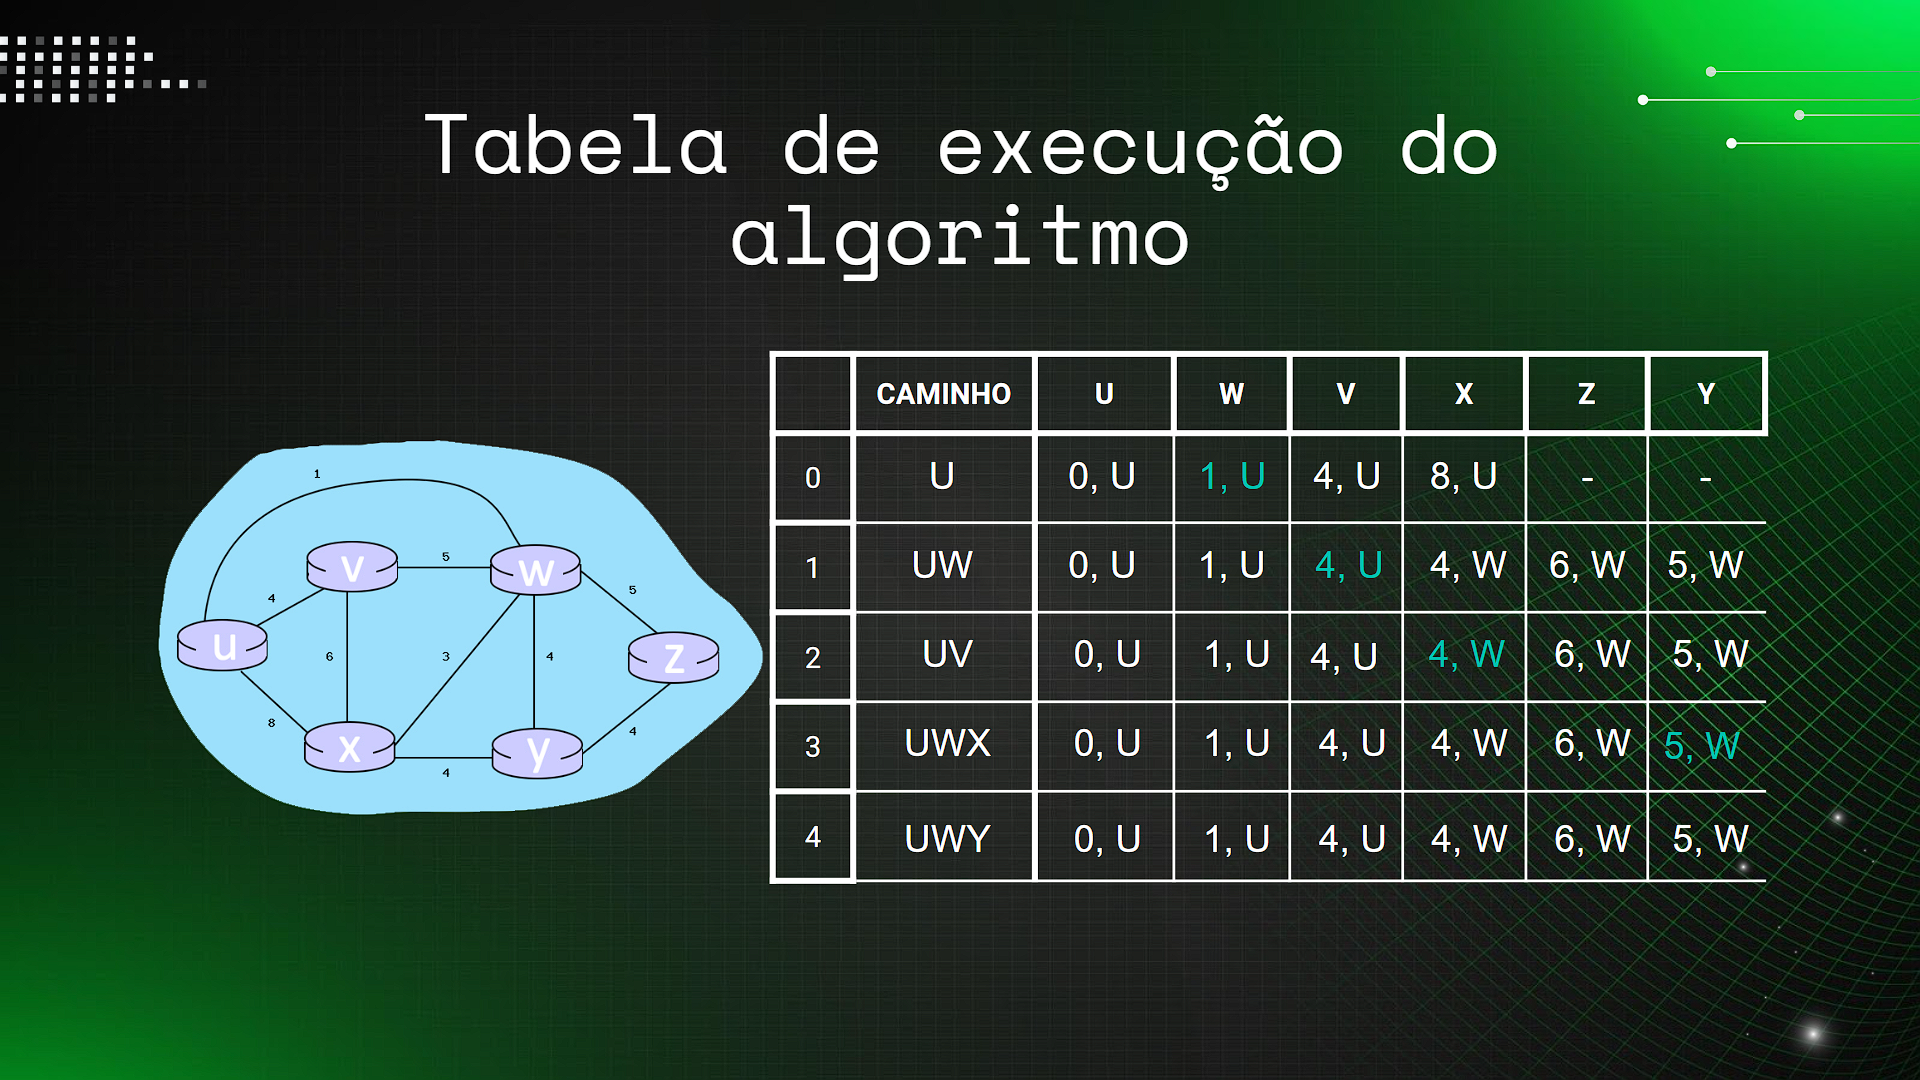

## Implementação

In [ ]:
import math

def dijkstra(grafo, s):
  nao_visitados = [*grafo.keys()]
  S = {}
  vertices_anteriores = {}

  for v in grafo.keys():
      S[v] = math.inf

  S[s] = 0


  while nao_visitados:
    menor_caminho_atual = None
    for vertice in nao_visitados:
      if menor_caminho_atual == None:
          menor_caminho_atual = vertice
      elif S[vertice] < S[menor_caminho_atual]:
          menor_caminho_atual = vertice

    vizinhos = grafo[menor_caminho_atual]

    for vizinho in vizinhos:
        tentative_value = S[menor_caminho_atual] + grafo[menor_caminho_atual][vizinho]
        if tentative_value < S[vizinho]:
            S[vizinho] = tentative_value
            vertices_anteriores[vizinho] = menor_caminho_atual
            
    nao_visitados.remove(menor_caminho_atual)

  return vertices_anteriores, S

def print_result(vertices_anteriores, S, origem, destino):
    caminho = []
    vertice = destino
    
    while vertice != origem:
        caminho.append(vertice)
        vertice = vertices_anteriores[vertice]
 
    caminho.append(origem)
    
    print(f"Distância: {S[destino]}")
    print(" -> ".join(reversed(caminho)))


In [ ]:

grafo = {
    'u': {
        'v': 4,
        'x': 8,
        'w': 1
    },
    'v':{
        'u':4,
        'x':6,
        'w':5
    },
    'x':{
        'u':8,
        'v':6,
        'w':3,
        'y':4
    },
    'w':{
        'v':5,
        'x':3,
        'y':4,
        'z':5
    },
    'y':{
        'x':4,
        'w':4,
        'z':4
    },
    'z':{
        'w':5,
        'y':4
    },
}

In [ ]:
vertices_anteriores, S = dijkstra(grafo, 'u')

In [ ]:
print_result(vertices_anteriores, S, 'u', 'z')

Distância: 6
u -> w -> z


In [ ]:
import random

def gerar_grafo(V=6, E=4, distancia=[1, 10]):
  grafo = {}
  
  for v in range(V):
    grafo[hex(v)[2:]] = {}
    for e in range(E):
      vizinho = hex(random.randint(0, V-1))[2:]
      grafo[hex(v)[2:]][vizinho] = random.randint(distancia[0], distancia[1])
      
      if vizinho not in grafo:
        grafo[vizinho] = {}
      grafo[vizinho][hex(v)[2:]] = grafo[hex(v)[2:]][vizinho]

  
  return grafo

In [ ]:
grafo

{'u': {'v': 4, 'x': 8, 'w': 1},
 'v': {'u': 4, 'x': 6, 'w': 5},
 'x': {'u': 8, 'v': 6, 'w': 3, 'y': 4},
 'w': {'v': 5, 'x': 3, 'y': 4, 'z': 5},
 'y': {'x': 4, 'w': 4, 'z': 4},
 'z': {'w': 5, 'y': 4}}

In [ ]:
grafo_ = gerar_grafo(1000, 3, [1,100])

In [ ]:
grafo_

{'0': {'1e2': 13, '221': 75, '34f': 60, 'd4': 45, '3d9': 17},
 '1e2': {'101': 57, '1c1': 12, '25': 32},
 '221': {'71': 33, '2f1': 79, 'a8': 94},
 '34f': {'10': 82, '19c': 65, '1f5': 34},
 '1': {'55': 13,
  '2e2': 20,
  '333': 43,
  '62': 88,
  '1bc': 85,
  '1da': 41,
  '2da': 63,
  '3d4': 59},
 '55': {'2f6': 1,
  '284': 76,
  '33c': 69,
  '17e': 38,
  '1a4': 59,
  '236': 77,
  '2c9': 24,
  '3d0': 67},
 '2e2': {'2e0': 4, '123': 57, '3e3': 98, '30a': 64, '373': 68},
 '333': {'9a': 61, '14c': 11, '277': 17},
 '2': {'c8': 97,
  '1ad': 21,
  '6d': 61,
  '100': 95,
  '138': 88,
  '263': 92,
  '292': 26,
  '30c': 36,
  '3b4': 98},
 'c8': {'244': 19, '59': 6, '387': 30, '1ff': 37, '2ca': 7},
 '1ad': {'288': 49, '71': 8, '36': 63, '234': 68, '2b0': 19},
 '6d': {'1e9': 45, '1ce': 47, 'b7': 37, '28d': 57},
 '3': {'2ce': 78,
  '4e': 77,
  '37d': 69,
  '2a': 100,
  'b6': 93,
  'de': 4,
  '124': 100,
  '2e4': 40},
 '2ce': {'2fd': 32, '388': 94, '5': 68},
 '4e': {'dc': 20, '31b': 13, '15b': 57, '21b'

In [ ]:
vertices_anteriores, S = dijkstra(grafo_, '0')
print_result(vertices_anteriores, S, '0', '7')

Distância: 178
0 -> 221 -> 71 -> c6 -> 3a3 -> 7


# Minimum Cost Spanning Trees (Kruskal’s Algorithm)

##Definição
 Seja G = (V,E) um grafo conexo não direcionado com
pesos em suas arestas. Uma árvore geradora (V,T) de G é um subgrafo de G que
é uma árvore. Se G é ponderado e a soma dos pesos das arestas em T é
mínimo, então (V,T ) é chamada de árvore geradora de custo mínimo ou simplesmente
árvore geradora mínima

##Algoritmo de Kruskal

Entrada: Um grafo G conexo e não direcionado, com as arestas numeradas (O peso das arestas deve ser positivo ou nulo). 

O algoritmo de Kruskal tem o objetivo de identificar uma árvore geradora mínima em um determinado grafo G em tempo operacional de O(m log n). Para isso os seguintes passos devem ser seguidos:

1.   Remover todas as arestas paralelas de maior custo e ciclos do grafo.
2.   Gerar um novo grafo parcial constituido por todos os vértices do grafo G.
3.   Ordenar as arestas de forma crescente de seus pesos.
4.   Para cada aresta da lista ordenada:
        Se um ciclo se formar no grafo, a aresta é ignorada.
        Caso contrário ela é adicionada ao grafo parcial.

  Ao fim da execução do algoritmo, a saída esperada é o custo mínimo do grafo que seja a árvore geradora mínima do dado grafo G, contendo (N-1) arestas, sendo N o número de vértices do grafo.

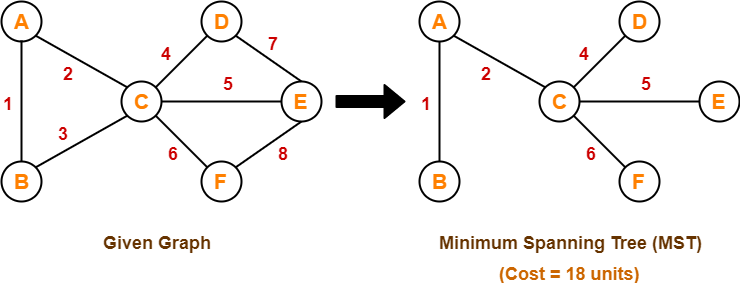



In [ ]:
class Graph:

	def __init__(self, vertices):
		self.V = vertices 
		self.graph = []

	def addEdge(self, u, v, w):
		self.graph.append([u, v, w])

	def find(self, parent, i):
		if parent[i] != i:
			parent[i] = self.find(parent, parent[i])
		return parent[i]

	def union(self, parent, rank, x, y):
		
		if rank[x] < rank[y]:
			parent[x] = y
		elif rank[x] > rank[y]:
			parent[y] = x
		else:
			parent[y] = x
			rank[x] += 1

	def KruskalMST(self):

		result = []

		i = 0
		e = 0

		self.graph = sorted(self.graph,
							key=lambda item: item[2])

		parent = []
		rank = []

		for node in range(self.V):
			parent.append(node)
			rank.append(0)

		while e < self.V - 1:

			u, v, w = self.graph[i]
			i = i + 1
			x = self.find(parent, u)
			y = self.find(parent, v)

			if x != y:
				e = e + 1
				result.append([u, v, w])
				self.union(parent, rank, x, y)

		minimumCost = 0
		print("Arestas da MST construída:")
		for u, v, weight in result:
			minimumCost += weight
			print("%d -- %d == %d" % (u, v, weight))
		print("Custo da MST", minimumCost)


if __name__ == '__main__':
	g = Graph(4)
	g.addEdge(0, 1, 10)
	g.addEdge(0, 2, 6)
	g.addEdge(0, 3, 5)
	g.addEdge(1, 3, 15)
	g.addEdge(2, 3, 4)

	g.KruskalMST()

Arestas da MST construída:
2 -- 3 == 4
0 -- 3 == 5
0 -- 1 == 10
Custo da MST 19


# Minimum Cost Spanning Trees (Prim’s Algorithm)

## Algoritmo de Prim

Algoritmo de Prim encontra uma árvore geradora de custo mínimo em um grafo conexo, não direcionado e ponderado tendo uma abordagem totalmente diferente do Algoritmo kruskal.  

Tempo de complexidade:  
$\theta(n^2)$

## Como funciona:

1. O algoritmo começa criando dois conjuntos de vértices: X = {1} e Y = {2, 3, . . . , n}; 

2. Em seguida, cria uma árvore geradora T, uma aresta de cada vez;

3. A cada passo, ele encontra uma aresta (x, y) de peso mínimo, onde x ∈ X e y ∈ Y e move y de Y para X.

4. Essa aresta é adicionada às arestas da árvore geradora mínima atual em T.

5. As etapas 3 e 4 são repetida até que Y fique vazio.

![prim](https://i.imgur.com/QcNYmWN.png)


## Implementação do algoritmo:

In [ ]:
import sys # Library for INT_MAX

#Classe do grafico
class Graph():

	def __init__(self, vertices):
		self.V = vertices
		self.graph = [[0 for column in range(vertices)]
					for row in range(vertices)]

	def printMST(self, parent):
		print("Arestas \tPeso")
		for i in range(1, self.V):
			print(parent[i]+1, "-", i+1, "\t", self.graph[i][parent[i]])


	# Caminho de menor valor do vertice, apartir do conjunto de não incluso na MST  
	def minKey(self, key, mstSet):

		# Inicializa o valor minimo
		min = sys.maxsize

		for v in range(self.V):
			if key[v] < min and mstSet[v] == False:
				min = key[v]
				min_index = v

		return min_index

# Constroir e Imprimir a MST em forma de matriz adjacência
	def primMST(self):

		key = [sys.maxsize] * self.V
		parent = [None] * self.V 
		key[0] = 0
		mstSet = [False] * self.V

		parent[0] = -1

		for cout in range(self.V):

			u = self.minKey(key, mstSet)

			mstSet[u] = True

			for v in range(self.V):

				if self.graph[u][v] > 0 and mstSet[v] == False and key[v] > self.graph[u][v]:
					key[v] = self.graph[u][v]
					parent[v] = u

		self.printMST(parent)


if __name__ == '__main__':
	g = Graph(6)
	#						1, 2, 3, 4, 5, 6
	g.graph = [[0, 1, 2, 0, 0, 0],
						[1, 0, 6, 11, 0, 0],
						[2, 6, 0, 9, 13, 0],
						[0, 11, 9, 0, 7, 3],
						[0, 0, 13, 7, 0, 4],
						[0, 0, 0, 3, 4, 0]]

	g.primMST()


Arestas 	Peso
1 - 2 	 1
1 - 3 	 2
3 - 4 	 9
6 - 5 	 4
4 - 6 	 3


## File Compression

***Inputs:*** Uma cadeia de caracteres e a frequencia individual em que cada caractere aparece na string.

***Question:*** Compactar o arquivo o máximo possível de forma que possa ser facilmente reconstruído.

## Algoritmo de Huffman

O algoritmo de Huffman recebe um fluxo de bits e devolve um fluxo de bits comprimido que representa o fluxo original. Em geral, o fluxo comprimido é mais curto que o original.

O fluxo de bits original é lido de 8 em 8 bits, como se fosse um fluxo de caracteres:
- 01000001 01000010 01010010 01000001 01000011 00000010 10001000 10000010 01000010 01010010 01000001 00100001
       A       B       R       A       C       A       D       A       B       R       A       !

Tudo se passa como se o algoritmo transformasse uma string em uma cadeia de bits.  Exemplo: transforma  ABRACADABRA!  em  011111110011001000111111100101 .

Cada caractere da string original é convertido em uma pequena cadeia de bits, que é o seu código.  Por exemplo,  C  é convertido em  110.

A Ideia do algoritmo de Huffman é usar códigos curtos para os caracteres que ocorrem com frequência e deixar os códigos mais longos para os caracteres mais raros.  Os códigos são, portanto, de comprimento variável.

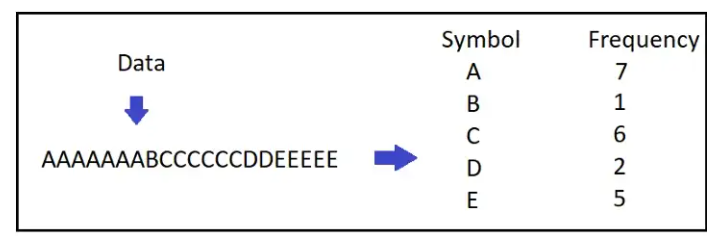

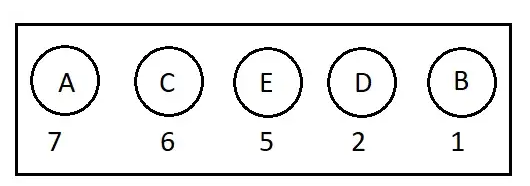

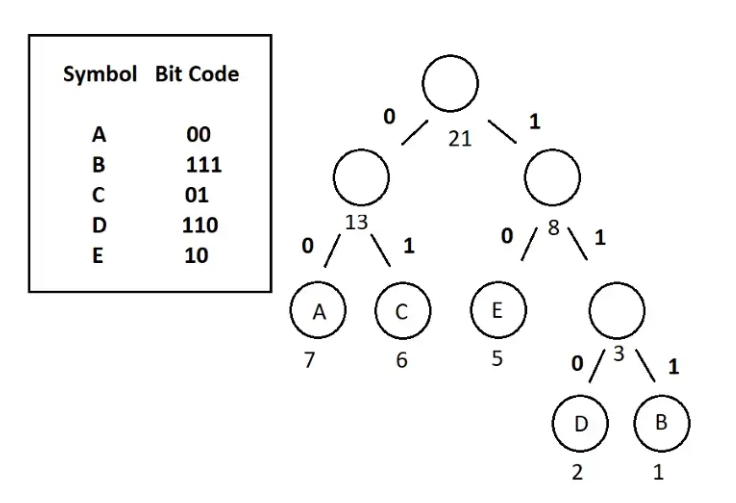

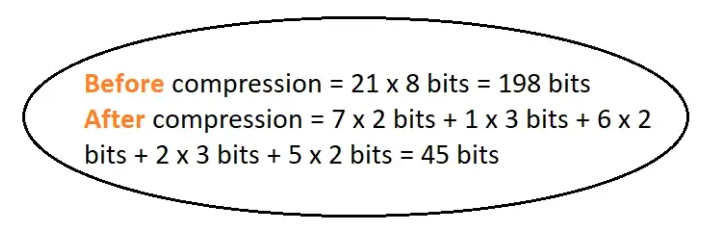

In [ ]:
# A Huffman Tree Node
class Node:
    def __init__(self, prob, symbol, left=None, right=None):
        # probability of symbol
        self.prob = prob

        # symbol 
        self.symbol = symbol

        # left node
        self.left = left

        # right node
        self.right = right

        # tree direction (0/1)
        self.code = ''

""" A helper function to print the codes of symbols by traveling Huffman Tree"""
codes = dict()

def Calculate_Codes(node, val=''):
    # huffman code for current node
    newVal = val + str(node.code)

    if(node.left):
        Calculate_Codes(node.left, newVal)
    if(node.right):
        Calculate_Codes(node.right, newVal)

    if(not node.left and not node.right):
        codes[node.symbol] = newVal
         
    return codes        

""" A helper function to calculate the probabilities of symbols in given data"""
def Calculate_Probability(data):
    symbols = dict()
    for element in data:
        if symbols.get(element) == None:
            symbols[element] = 1
        else: 
            symbols[element] += 1     
    return symbols

""" A helper function to obtain the encoded output"""
def Output_Encoded(data, coding):
    encoding_output = []
    for c in data:
      #  print(coding[c], end = '')
        encoding_output.append(coding[c])
        
    string = ''.join([str(item) for item in encoding_output])    
    return string
        
""" A helper function to calculate the space difference between compressed and non compressed data"""    
def Total_Gain(data, coding):
    before_compression = len(data) * 8 # total bit space to stor the data before compression
    after_compression = 0
    symbols = coding.keys()
    for symbol in symbols:
        count = data.count(symbol)
        after_compression += count * len(coding[symbol]) #calculate how many bit is required for that symbol in total
    print("Space usage before compression (in bits):", before_compression)    
    print("Space usage after compression (in bits):",  after_compression)           

def Huffman_Encoding(data):
    symbol_with_probs = Calculate_Probability(data)
    symbols = symbol_with_probs.keys()
    probabilities = symbol_with_probs.values()
    print("symbols: ", symbols)
    print("probabilities: ", probabilities)
    
    nodes = []
    
    # converting symbols and probabilities into huffman tree nodes
    for symbol in symbols:
        nodes.append(Node(symbol_with_probs.get(symbol), symbol))
    
    while len(nodes) > 1:
        # sort all the nodes in ascending order based on their probability
        nodes = sorted(nodes, key=lambda x: x.prob)
        # for node in nodes:  
        #      print(node.symbol, node.prob)
    
        # pick 2 smallest nodes
        right = nodes[0]
        left = nodes[1]
    
        left.code = 0
        right.code = 1
    
        # combine the 2 smallest nodes to create new node
        newNode = Node(left.prob+right.prob, left.symbol+right.symbol, left, right)
    
        nodes.remove(left)
        nodes.remove(right)
        nodes.append(newNode)
            
    huffman_encoding = Calculate_Codes(nodes[0])
    print("symbols with codes", huffman_encoding)
    Total_Gain(data, huffman_encoding)
    encoded_output = Output_Encoded(data,huffman_encoding)
    return encoded_output, nodes[0]  
    
 
def Huffman_Decoding(encoded_data, huffman_tree):
    tree_head = huffman_tree
    decoded_output = []
    for x in encoded_data:
        if x == '1':
            huffman_tree = huffman_tree.right   
        elif x == '0':
            huffman_tree = huffman_tree.left
        try:
            if huffman_tree.left.symbol == None and huffman_tree.right.symbol == None:
                pass
        except AttributeError:
            decoded_output.append(huffman_tree.symbol)
            huffman_tree = tree_head
        
    string = ''.join([str(item) for item in decoded_output])
    return string        

data = "AAAAAAABCCCCCCDDEEEEE"
print(data)
encoding, tree = Huffman_Encoding(data)
print("Encoded output", encoding)
print("Decoded Output", Huffman_Decoding(encoding,tree))

AAAAAAABCCCCCCDDEEEEE
symbols:  dict_keys(['A', 'B', 'C', 'D', 'E'])
probabilities:  dict_values([7, 1, 6, 2, 5])
symbols with codes {'A': '00', 'C': '01', 'E': '10', 'D': '110', 'B': '111'}
Space usage before compression (in bits): 168
Space usage after compression (in bits): 45
Encoded output 000000000000001110101010101011101101010101010
Decoded Output AAAAAAABCCCCCCDDEEEEE


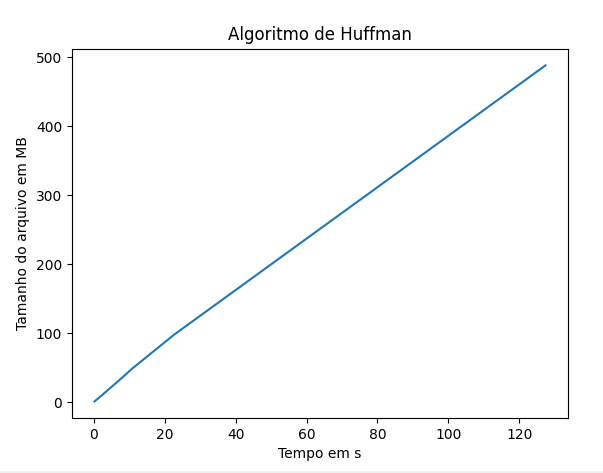

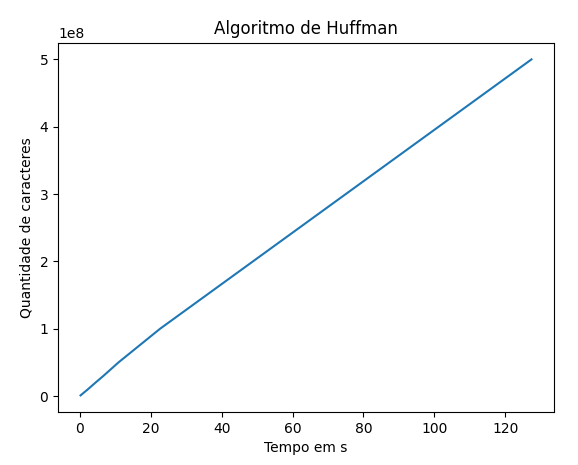